In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(20,8)})
import scipy.stats as stats

In [2]:
data = pd.read_csv('Netology_A_B-testing_HW_1.csv')

In [3]:
data

,Unnamed: 0,date,user_id,hour,app_opened,price_seen,order_made,surge,ride_completed,user_cancelled,age,os,city_center_order,order_class,distance,rfm
0,0,2020-05-21,867689,12,1,1,1,no surge,1,0,20,iOS,0,business,7.982135,low
1,1,2020-05-23,752172,5,1,1,1,no surge,1,0,37,Android,1,economy,2.908468,high
2,2,2020-05-20,486559,15,1,1,1,no surge,1,0,47,Android,0,comfort,7.224614,low
3,3,2020-05-19,304024,0,1,1,1,no surge,1,0,59,Android,1,economy,1.874349,low
4,4,2020-05-23,139420,0,1,1,1,no surge,1,0,19,Android,0,business,10.704778,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101495,101495,2020-05-24,288445,16,1,1,1,no surge,1,0,29,Android,0,comfort,1.725907,high
101496,101496,2020-05-19,627754,2,1,1,1,surge,1,0,23,iOS,1,comfort,6.206134,medium
101497,101497,2020-05-23,784442,1,1,1,1,no surge,1,0,40,iOS,0,economy,6.624225,medium
101498,101498,2020-05-20,232993,13,1,1,1,no surge,1,0,52,iOS,0,business,8.825188,low


# Гипотеза 1

In [99]:
data1 = data[(data.os=='Android' ) & (data.surge=='no surge')]

In [100]:
data1 

,Unnamed: 0,date,user_id,hour,app_opened,price_seen,order_made,surge,ride_completed,user_cancelled,age,os,city_center_order,order_class,distance,rfm
1,1,2020-05-23,752172,5,1,1,1,no surge,1,0,37,Android,1,economy,2.908468,high
2,2,2020-05-20,486559,15,1,1,1,no surge,1,0,47,Android,0,comfort,7.224614,low
3,3,2020-05-19,304024,0,1,1,1,no surge,1,0,59,Android,1,economy,1.874349,low
4,4,2020-05-23,139420,0,1,1,1,no surge,1,0,19,Android,0,business,10.704778,medium
7,7,2020-05-22,682337,2,1,1,1,no surge,1,0,40,Android,1,comfort,9.055344,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101479,101479,2020-05-21,112013,14,1,1,1,no surge,1,0,22,Android,0,comfort,6.090853,low
101485,101485,2020-05-19,427672,16,1,1,1,no surge,1,0,21,Android,1,business,19.971031,low
101487,101487,2020-05-24,550292,13,1,1,1,no surge,0,1,40,Android,0,economy,6.475528,medium
101491,101491,2020-05-21,456333,10,1,1,1,no surge,1,0,34,Android,1,business,16.003392,high


In [101]:
data1 = data1.groupby('user_id')['order_made'].mean().reset_index()

In [102]:
data1['Group'] = np.random.randint(1,3, size=len(data1))

In [103]:
data1

,user_id,order_made,Group
0,100093,1.000000,1
1,100118,1.000000,1
2,100134,0.750000,2
3,100166,1.000000,2
4,100255,0.333333,2
...,...,...,...
18001,999870,0.500000,2
18002,999878,1.000000,1
18003,999945,0.500000,1
18004,999962,1.000000,1


In [104]:
gr1 = data1[data1['Group']==1]
gr2 = data1[data1['Group']==2]

In [105]:
print(len(gr1))
print(len(gr2))

8918
9088


In [106]:
gr2 = gr2[0:len(gr1)]

In [107]:
t, p_value = stats.ttest_ind(gr1['order_made'], gr2['order_made']) 
t, p_value

(-0.6515114857192943, 0.5147247603874152)

(array([7.800e+02, 0.000e+00, 8.000e+00, 9.800e+01, 1.000e+00, 9.190e+02,
        4.270e+02, 1.600e+02, 5.900e+01, 6.466e+03]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

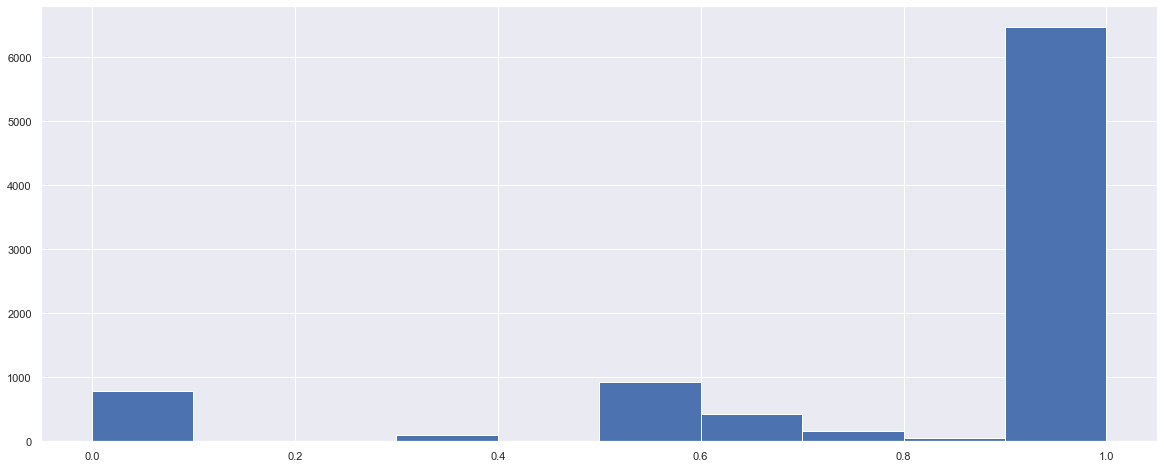

In [108]:
plt.hist(gr2['order_made'])

(array([8.410e+02, 0.000e+00, 9.000e+00, 9.600e+01, 2.000e+00, 8.590e+02,
        4.220e+02, 1.460e+02, 6.900e+01, 6.474e+03]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

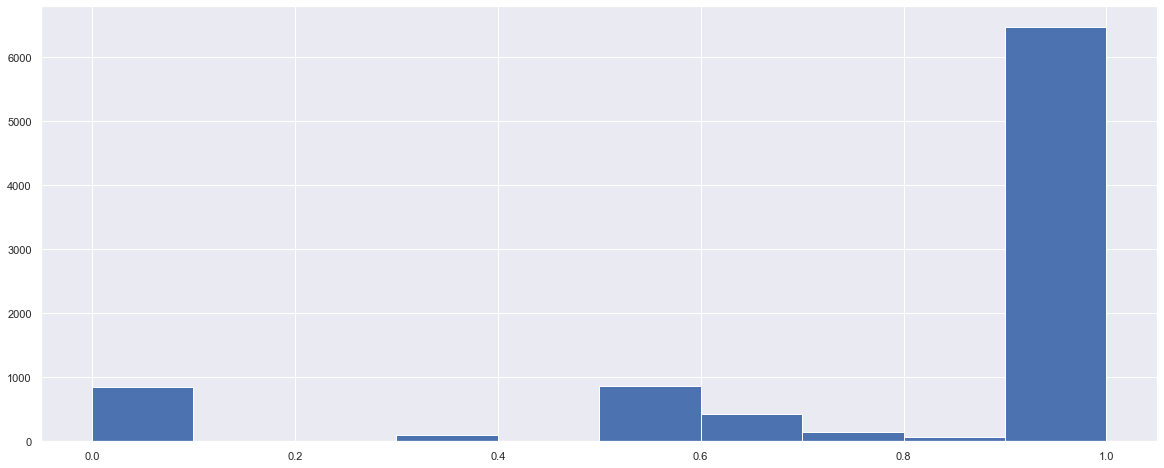

In [109]:
plt.hist(gr1['order_made'])

#  Гипотеза 2

In [127]:
data2 = data[((data.rfm=='high') | (data.rfm=='medium')) & (data.surge=='surge') & (data.order_made==0)]

In [128]:
data2 = data2.groupby('user_id')['age'].mean().reset_index()

In [129]:
data2['Group'] = np.random.randint(1,3, size=len(data2))

In [130]:
data2

,user_id,age,Group
0,100093,21.0,2
1,100255,31.0,1
2,100275,28.0,1
3,100405,41.0,2
4,100434,34.0,2
...,...,...,...
4343,999026,48.0,2
4344,999120,20.0,1
4345,999239,64.0,1
4346,999593,69.0,1


In [131]:
gr11 = data2[data2['Group']==1]
gr22 = data2[data2['Group']==2]

In [132]:
print(len(gr11))
print(len(gr22))

2164
2184


In [133]:
gr22 = gr22[0:len(gr11)]

In [134]:
t, p_value = stats.ttest_ind(gr11['age'], gr22['age']) 
t, p_value

(0.36868992092094127, 0.712376903893583)

(array([215., 188., 232., 209., 223., 251., 216., 192., 205., 233.]),
 array([18. , 23.1, 28.2, 33.3, 38.4, 43.5, 48.6, 53.7, 58.8, 63.9, 69. ]),
 <BarContainer object of 10 artists>)

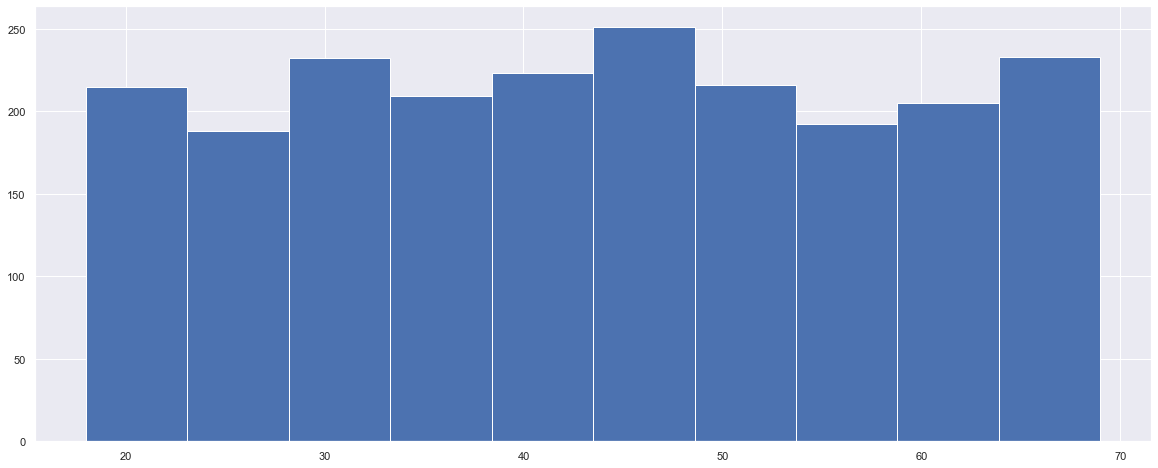

In [135]:
plt.hist(gr11['age'])

(array([243., 170., 222., 197., 235., 228., 243., 206., 194., 226.]),
 array([18. , 23.1, 28.2, 33.3, 38.4, 43.5, 48.6, 53.7, 58.8, 63.9, 69. ]),
 <BarContainer object of 10 artists>)

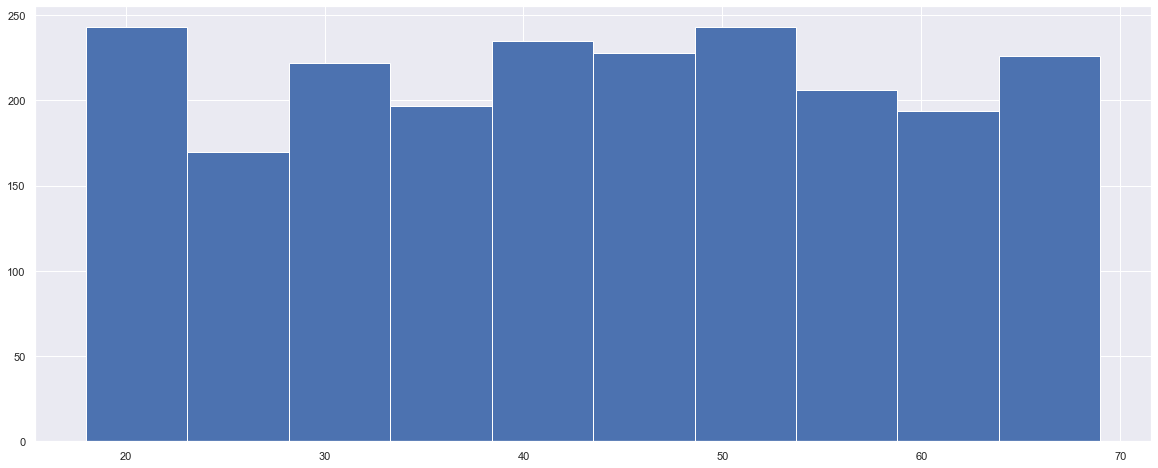

In [136]:
plt.hist(gr22['age'])

In [ ]:
Вывод: выборки почти идентичны